<a href="https://colab.research.google.com/github/Marcelooyola/Modulo7/blob/main/copia_de_rg_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![logo](https://github.com/cristiandarioortegayubro/BA/blob/main/dba.png?raw=true)

![](https://scikit-learn.org/stable/_static/scikit-learn-logo-small.png)

# **Regresión**


# ***Arbol de Regresión***

## **Bibliotecas**

### **Instalando bibliotecas**

In [61]:
!pip install plotly --upgrade

### **Análisis de datos**

In [62]:
import numpy as np
import pandas as pd

### **Gráficos**

In [63]:
import plotly.express as px
import matplotlib.pyplot as plt #para graficar

### **Preprocesado y modelado**

#### **Con Scikit-learn**

In [64]:
import sklearn
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor #libreria de arbol de decision
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.tree import export_text
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

## **Conjunto de Datos**

Dataset completo:
https://www.kaggle.com/code/msorondo/a-housing-price-predictor-for-buenos-aires-c/data

In [65]:
url = datos = "https://raw.githubusercontent.com/cristiandarioortegayubro/BA/main/Datasets/propiedades.csv"

## ***Dataframe***

In [66]:
datos = pd.read_csv(url, index_col = 0)

In [67]:
datos.head(10)

,id,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
0,0,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,80.0,NaN,235000
1,1,Argentina,Capital Federal,Belgrano,NaN,NaN,1.0,NaN,40.0,105000
2,2,Argentina,Capital Federal,San Telmo,1.0,NaN,1.0,34.0,31.0,109183
3,3,Argentina,Capital Federal,Villa Urquiza,2.0,NaN,1.0,NaN,51.0,110000
4,4,Argentina,Capital Federal,Belgrano,6.0,4.0,2.0,190.0,178.0,550000
5,5,Argentina,Capital Federal,Belgrano,4.0,3.0,2.0,240.0,NaN,750000
6,6,Argentina,Capital Federal,Palermo,4.0,3.0,2.0,240.0,NaN,750000
7,7,Argentina,Capital Federal,Puerto Madero,3.0,2.0,3.0,161.0,149.0,1600000
8,8,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,38.0,38.0,132000
9,9,Argentina,Capital Federal,Palermo,3.0,2.0,1.0,80.0,75.0,245000


In [68]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44678 entries, 0 to 44677
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               44678 non-null  int64  
 1   l1               44678 non-null  object 
 2   l2               44678 non-null  object 
 3   l3               44382 non-null  object 
 4   rooms            43547 non-null  float64
 5   bedrooms         38623 non-null  float64
 6   bathrooms        43371 non-null  float64
 7   surface_total    39856 non-null  float64
 8   surface_covered  40641 non-null  float64
 9   price            44678 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 3.7+ MB


**Variables:**

* l1 - país
* l2 - provincia o ciudad
* l3 - barrio
* rooms - cantidad de habitaciones
* bedrooms - cantidad de dormitorios
* bathrooms - cantidad de baños
* surface_total - superficie total
* surface_covered - superficie cubierta
* price - precio

In [69]:
#elimino las columnas irrelevantes:
datos.drop(columns=["id","l1","l2"], inplace=True)

In [70]:
lista = ["Localidad", "Ambientes", "Habitaciones", "Baños", "Sup_Total", "Sup_Cubierta", "Precio"]
datos.columns = lista
datos.head()

,Localidad,Ambientes,Habitaciones,Baños,Sup_Total,Sup_Cubierta,Precio
0,Palermo,2.0,1.0,1.0,80.0,NaN,235000
1,Belgrano,NaN,NaN,1.0,NaN,40.0,105000
2,San Telmo,1.0,NaN,1.0,34.0,31.0,109183
3,Villa Urquiza,2.0,NaN,1.0,NaN,51.0,110000
4,Belgrano,6.0,4.0,2.0,190.0,178.0,550000


## ***Análisis exploratorio de datos***

In [71]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44678 entries, 0 to 44677
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Localidad     44382 non-null  object 
 1   Ambientes     43547 non-null  float64
 2   Habitaciones  38623 non-null  float64
 3   Baños         43371 non-null  float64
 4   Sup_Total     39856 non-null  float64
 5   Sup_Cubierta  40641 non-null  float64
 6   Precio        44678 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 2.7+ MB


In [72]:
datos.groupby('Localidad').Precio.mean().sort_values(ascending = False).round(2).head()

Localidad
Puerto Madero    948009.98
Recoleta         391289.79
Belgrano         371872.17
Palermo          364539.30
Retiro           331506.30
Name: Precio, dtype: float64

In [73]:
datos.groupby(by=datos.Localidad).Precio.median().sort_values(ascending=False).head()

Localidad
Puerto Madero    700000.0
Recoleta         272032.0
Las Cañitas      250000.0
Belgrano         235000.0
Palermo          210000.0
Name: Precio, dtype: float64

In [74]:
datos.describe().T

,count,mean,std,min,25%,50%,75%,max
Ambientes,43547.0,2.710933,1.348082,1.0,2.0,3.0,3.0,35.0
Habitaciones,38623.0,1.984258,1.637968,0.0,1.0,2.0,3.0,153.0
Baños,43371.0,1.531392,0.864967,1.0,1.0,1.0,2.0,18.0
Sup_Total,39856.0,90.721999,333.833650,10.0,44.0,65.0,100.0,43000.0
Sup_Cubierta,40641.0,79.210846,222.804210,1.0,40.0,57.0,90.0,43000.0
Precio,44678.0,278897.116097,390234.532888,0.0,108000.0,161000.0,289000.0,21400000.0


In [75]:
datos.describe(include="object").T

,count,unique,top,freq
Localidad,44382,57,Palermo,8569


In [76]:
datos.isnull().sum()

Localidad        296
Ambientes       1131
Habitaciones    6055
Baños           1307
Sup_Total       4822
Sup_Cubierta    4037
Precio             0
dtype: int64

In [77]:
datos.isnull().mean()

Localidad       0.006625
Ambientes       0.025314
Habitaciones    0.135525
Baños           0.029254
Sup_Total       0.107928
Sup_Cubierta    0.090358
Precio          0.000000
dtype: float64

In [78]:
px.histogram(datos,
             x = datos.Precio,
             marginal="box",
             template = "gridon")

## ***Relación entre variables***

In [79]:
corr_matrix = round(datos.corr(),3) #correlacion entre variables

<ipython-input-79-daf4b94cef11>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



### **Matriz de correlaciones**

In [80]:
px.imshow(corr_matrix,
          title = "Matriz de correlacion",
          text_auto = True,
          template = "gridon",
          labels={"color":"Coeficiente"})

In [81]:
datos.isnull().mean().sort_values()

Precio          0.000000
Localidad       0.006625
Ambientes       0.025314
Baños           0.029254
Sup_Cubierta    0.090358
Sup_Total       0.107928
Habitaciones    0.135525
dtype: float64

Ambientes, habitaciones y baños son variables explicativas que están correlacionadas entre si. Particularmente, ambientes y habitaciones tiene un coeficiente de correlación alto (0.852). Dado que Habitaciones tiene un 13.55% de datos faltantes, es recomendable eliminar esa columna. Además, la cantidad de ambientes tiene mayor correlación con el precio que la cantidad de habitaciones.

In [82]:
datos.drop(columns=["Habitaciones"], inplace=True)

In [83]:
datos

,Localidad,Ambientes,Baños,Sup_Total,Sup_Cubierta,Precio
0,Palermo,2.0,1.0,80.0,NaN,235000
1,Belgrano,NaN,1.0,NaN,40.0,105000
2,San Telmo,1.0,1.0,34.0,31.0,109183
3,Villa Urquiza,2.0,1.0,NaN,51.0,110000
4,Belgrano,6.0,2.0,190.0,178.0,550000
...,...,...,...,...,...,...
44673,Monte Castro,2.0,1.0,56.0,54.0,115000
44674,Barrio Norte,2.0,1.0,NaN,NaN,105000
44675,Colegiales,2.0,1.0,45.0,40.0,99000
44676,Colegiales,1.0,1.0,59.0,59.0,105000


Se procede a eliminar las filas con valores faltantes. Otra alternativa a probar es la imputación de valores faltantes.

In [84]:
datos.dropna(axis=0, inplace = True)

In [85]:
datos

,Localidad,Ambientes,Baños,Sup_Total,Sup_Cubierta,Precio
2,San Telmo,1.0,1.0,34.0,31.0,109183
4,Belgrano,6.0,2.0,190.0,178.0,550000
7,Puerto Madero,3.0,3.0,161.0,149.0,1600000
8,Palermo,2.0,1.0,38.0,38.0,132000
9,Palermo,3.0,1.0,80.0,75.0,245000
...,...,...,...,...,...,...
44672,Villa Crespo,2.0,1.0,29.0,29.0,72000
44673,Monte Castro,2.0,1.0,56.0,54.0,115000
44675,Colegiales,2.0,1.0,45.0,40.0,99000
44676,Colegiales,1.0,1.0,59.0,59.0,105000


In [86]:
px.scatter(datos,
           x = datos.Sup_Cubierta,
           y = datos.Precio,
           template = "gridon")

In [87]:
px.box(datos,
       x = datos.Sup_Cubierta)

In [88]:
datos = datos.drop(datos[datos.Sup_Cubierta > 1000].index)

In [90]:
datos = datos.drop(datos[datos.Precio > 10000000].index)

In [91]:
px.scatter(datos,
           x = datos.Sup_Cubierta,
           y = datos.Precio,
           trendline = 'ols',
           trendline_color_override = 'red',
           template = "gridon")

In [92]:
px.scatter(datos,
           x = datos.Sup_Cubierta,
           y = datos.Precio,
           template = "gridon",
           color = datos.Localidad)

In [95]:
datos[datos.Precio > 5000000]

,Localidad,Ambientes,Baños,Sup_Total,Sup_Cubierta,Precio
3722,Palermo,4.0,4.0,404.0,404.0,5100000
4125,Recoleta,10.0,3.0,489.0,489.0,5700000
21133,Puerto Madero,4.0,4.0,550.0,550.0,6500000
22454,Palermo,5.0,4.0,404.0,404.0,5900000
22591,Palermo,4.0,5.0,800.0,750.0,7500000
31159,San Nicolás,3.0,1.0,60.0,56.0,5000345
37671,Belgrano,8.0,6.0,516.0,456.0,5400000
40355,Puerto Madero,3.0,2.0,128.0,118.0,7149999
44583,Palermo,8.0,6.0,680.0,680.0,5800000


In [96]:
datos[(datos.Precio > 5000000) & (datos.Sup_Cubierta <100)]

,Localidad,Ambientes,Baños,Sup_Total,Sup_Cubierta,Precio
31159,San Nicolás,3.0,1.0,60.0,56.0,5000345


In [97]:
datos = datos.drop(datos[(datos.Precio > 5000000) & (datos.Sup_Cubierta <100)].index)

In [98]:
px.scatter(datos,
           x = datos.Sup_Cubierta,
           y = datos.Precio,
           template = "gridon",
           color = datos.Localidad)

In [99]:
datos.head()

,Localidad,Ambientes,Baños,Sup_Total,Sup_Cubierta,Precio
2,San Telmo,1.0,1.0,34.0,31.0,109183
4,Belgrano,6.0,2.0,190.0,178.0,550000
7,Puerto Madero,3.0,3.0,161.0,149.0,1600000
8,Palermo,2.0,1.0,38.0,38.0,132000
9,Palermo,3.0,1.0,80.0,75.0,245000


In [100]:
datos = pd.get_dummies(datos, columns=["Localidad"]) #one-hot-enconding
#transofrma la columna localidad en tantas columnas como valores tenga
#y usa valores de 0 y 1 (true y false)

In [101]:
datos.head()

,Ambientes,Baños,Sup_Total,Sup_Cubierta,Precio,Localidad_Abasto,Localidad_Agronomía,Localidad_Almagro,Localidad_Balvanera,Localidad_Barracas,...,Localidad_Villa Lugano,Localidad_Villa Luro,Localidad_Villa Ortuzar,Localidad_Villa Pueyrredón,Localidad_Villa Real,Localidad_Villa Riachuelo,Localidad_Villa Santa Rita,Localidad_Villa Soldati,Localidad_Villa Urquiza,Localidad_Villa del Parque
2,1.0,1.0,34.0,31.0,109183,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,6.0,2.0,190.0,178.0,550000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3.0,3.0,161.0,149.0,1600000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,2.0,1.0,38.0,38.0,132000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3.0,1.0,80.0,75.0,245000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## ***División de los datos en train y test***

In [102]:
X = datos.drop(columns=['Precio'])
y = datos['Precio']

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    train_size = 0.8,
                                                    random_state = 1)

## ***Arbol de regresión***

[Árbol de regresión](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)

### **Creación del modelo**

In [ ]:
modelo = DecisionTreeRegressor(random_state=1)
modelo.fit(X_train, y_train)

DecisionTreeRegressor(random_state=1)

In [ ]:
#Hiperparámetros del algoritmo
modelo.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 1,
 'splitter': 'best'}

### **Predicción**

In [ ]:
predicciones = modelo.predict(X_test)
print(predicciones[0:3,])

[148000.  75000. 850000.]


In [ ]:
tabla = pd.DataFrame({"Real": y_test,
                      "Predicción": predicciones,
                      "Diferencia":(predicciones-y_test)/y_test})
tabla

,Real,Predicción,Diferencia
42157,130000,148000.000000,0.138462
20194,67000,75000.000000,0.119403
4997,790000,850000.000000,0.075949
40547,120000,120000.000000,0.000000
33073,208000,242000.000000,0.163462
...,...,...,...
12134,165000,199500.000000,0.209091
18532,119538,119063.685714,-0.003968
34892,119000,130000.000000,0.092437
39232,870000,495333.333333,-0.430651


In [ ]:
tabla.mean()

Real          287103.012852
Predicción    288516.219957
Diferencia         0.047156
dtype: float64

### **Evaluacion del modelo**

#### **Error de la media de los cuadrados - MSE**

In [ ]:
round(mean_squared_error(y_test, predicciones,squared=False),3)

148530.0

#### **Error de la media absoluta - MAE**


In [ ]:
round(metrics.median_absolute_error(y_test, predicciones),3)

19878.571

#### **Coeficiente de determinación ($R^2$)**


In [ ]:
round(metrics.r2_score(y_test, predicciones),3)

0.837

## **Graficando el modelo**

In [ ]:
modelo2 = DecisionTreeRegressor(max_depth=3, random_state=1)
modelo2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=1)

In [ ]:
print(f"Profundidad del árbol: {modelo2.get_depth()}")
print(f"Número de nodos terminales: {modelo2.get_n_leaves()}")
print(f"El R2 es de: {metrics.r2_score(y_test,modelo2.predict(X_test))}")

Profundidad del árbol: 3
Número de nodos terminales: 8
El R2 es de: 0.7162327123032484


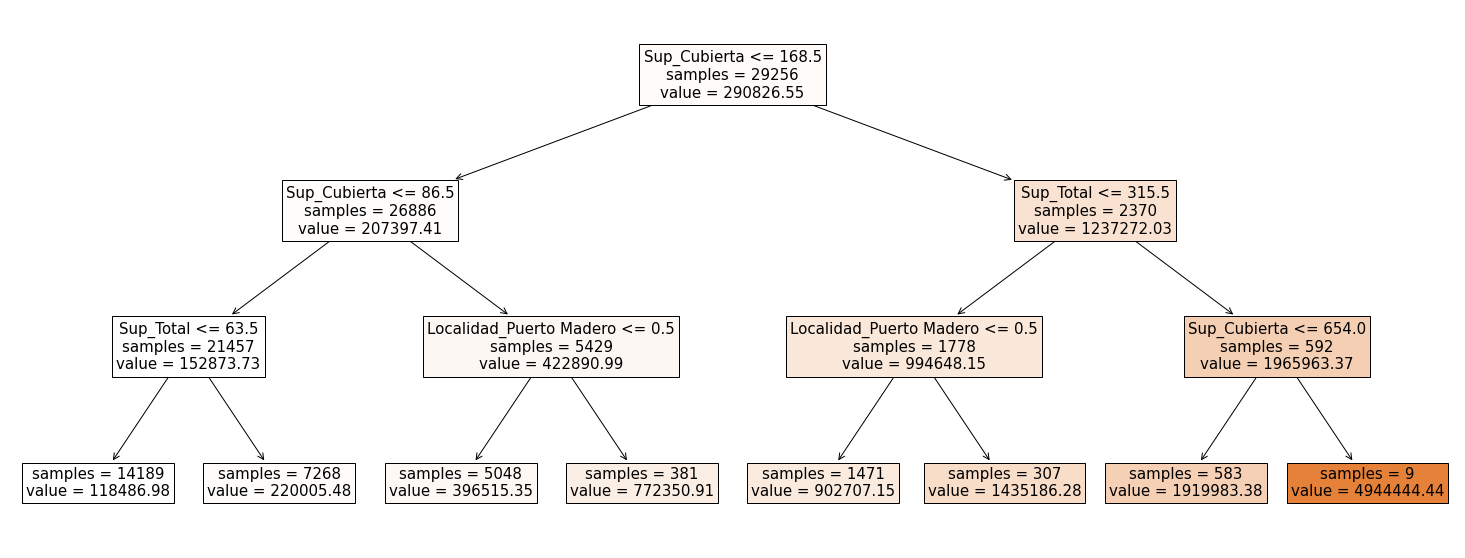

In [ ]:
fig, ax = plt.subplots(figsize=(26, 10))
plot = plot_tree(
            decision_tree = modelo2,
            feature_names = datos.drop(columns = "Precio").columns,
            class_names   = 'Precio',
            filled        = True,
            impurity      = False,
            fontsize      = 15,
            precision     = 2,
            ax            = ax)

## **Importancia de predictores**

La importancia de cada predictor en modelo se calcula como la reducción total (normalizada) en el criterio de división, en este caso el MSE, que consigue el predictor en las divisiones en las que participa. Si un predictor no ha sido seleccionado en ninguna divisón, no se ha incluido en el modelo y por lo tanto su importancia es 0.

In [ ]:
importancia_predictores = pd.DataFrame(
                            {'predictor': datos.drop(columns = "Precio").columns,
                             'importancia': modelo.feature_importances_*100})
print(" ")
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores.sort_values('importancia', ascending=False)


 
Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
3,Sup_Cubierta,69.581374
2,Sup_Total,16.397525
38,Localidad_Puerto Madero,4.264812
1,Baños,2.655152
30,Localidad_Palermo,2.624694
...,...,...
5,Localidad_Agronomía,0.000268
34,Localidad_Parque Chas,0.000199
27,Localidad_Monte Castro,0.000188
15,Localidad_Centro / Microcentro,0.000151
